In [71]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Tokenizing the data

In [72]:
def startsWithDate(s):
    pattern = '([0-1][0-2]|[0-9])(\/)([0-3][0-9]|[0-9])(\/)(20)(\,)([ ])([0-1][0-2]|[0-9])(\:)([0-6][0-9])( )([a-zA-Z]{2})( \-)'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [73]:
def startsWithAuthor(s):
    patterns = '([\w]+: )|([\w]+[\s]+[\w]+): '
    result = re.match(patterns, s)
    if result:
        return True
    return False

In [74]:
def getDataPoint(line):
    splitLine = line.split(' - ')   
    dateTime = splitLine[0] 
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:]) 
    
    if startsWithAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:]) 
    else:
        author = None
    return date, time, author, message

In [75]:
parsedData = [] 
conversationPath = '/users/farhan/downloads/WhatsApp Chat with Obama.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline()         
    messageBuffer = []
    date, time, author = None, None, None 
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if startsWithDate(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer

# Creating DF

In [85]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.iloc[4:7]

,Date,Time,Author,Message
4,2020-04-09,8:50 AM,Partner,Love you
5,2020-04-09,8:50 AM,Partner,Km sahur apaa?
6,2020-04-09,8:51 AM,Me,Ayam bakar tempe timun


# Dtype Cleaning

In [77]:
# Converting date column to datetime
df['Date'] = df['Date'].apply(pd.to_datetime)

# ----------------------------

# Exploratory Data Analysis

# ----------------------------

# Who talks the most

In [86]:
df['Author'].value_counts()

Me         22630
Partner    17368
Name: Author, dtype: int64

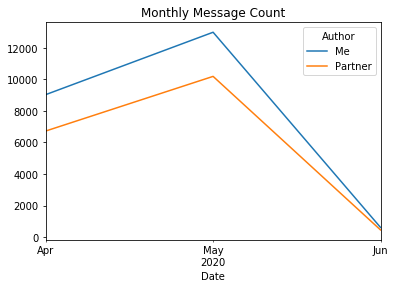

In [87]:
df.groupby(pd.Grouper(key = 'Date', freq = 'M'))['Author'].value_counts().unstack().plot(kind='line')
plt.title('Monthly Message Count')
plt.show()

# Who's Love Is Bigger

In [89]:
love_f = []
love_s = []
love_word = ['Love','love','Luv','luv','Wuff','wuff']
for i,v in df.iterrows():
    if any(s in df.loc[i,'Message'] for s in (love_word)):
        if df.loc[i,'Author'] == 'Partner':
            x = df.loc[i,'Author']
            love_s.append(x)
        else:
            y= df.loc[i,'Author']
            love_f.append(y)
    
love_df = {'Me_Love_Count':len(love_f), 'P_Love_Count':len(love_s)}       
love_df = pd.DataFrame(love_df, index = [0])
love_df


,Me_Love_Count,P_Love_Count
0,299,205


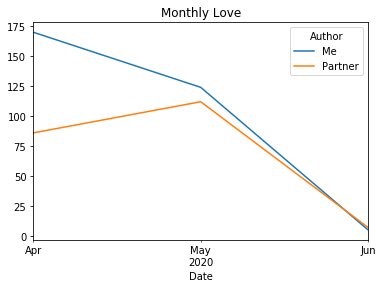

In [90]:
df[df.Message.str.contains('Love|love|luv|Luv|wuff|Wuff')].groupby(pd.Grouper(key='Date', freq='M'))['Author'].value_counts().unstack().plot(kind='line')
plt.xlabel('Date')
plt.title('Monthly Love')
plt.show()
